# Problem statment:

In [ ]:
# We have to predict the sentiment of fiancial news using nltk

# About Dataset

In [ ]:
# This dataset contains 3 csv file
# cnbc headline (3080, 3)
# gaurdian headline (17800, 2)
# reuters headline (32770, 3)
# Columns Provided in the Dataset

# cnbc headline
# 1. time
# 2. headlines
# 3. Description

# gaurdian headline
# 1. time
# 2. headline

# reuters headline
# 1. time
# 2. headline
# 3. description

# What is NLTK ?


In [170]:
# The Natural Language Toolkit (NLTK) is a platform used for building Python programs that work with human language data for applying in statistical natural language processing (NLP).
# It contains text processing libraries for tokenization, parsing, classification, stemming, tagging and semantic reasoning.

# What is sentiment analysis ?

In [ ]:
# Sentiment analysis is the process of detecting positive or negative sentiment in text. It’s often used by businesses to detect sentiment in social data, gauge brand reputation, and understand customers.

In [1]:
# Import all the required libraries 
import re
import pandas as pd
import numpy as np
import os
import datetime as dt
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
import string
!pip install emoji
import emoji
pd.set_option('display.max_rows',500)
import warnings
warnings.filterwarnings("ignore")
#import stopwords and text processing libraries
from collections import Counter
import string
import unicodedata
import nltk
nltk.download('all')
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from nltk.stem.porter import *
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Rahul\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Rahul\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Rahul\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Rahul\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\Rahul\AppData\Roaming\nltk_data...
[nltk_data]    | 

In [2]:
pip install xgboost

In [3]:
#import machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xg
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Basic EDA on cnbc_headlines dataset

In [4]:
# Read csv file of cnbc headlines using pandas

In [5]:
df_cnbc = pd.read_csv(r"C:\Users\Rahul\Downloads\Financial news headlines data\cnbc_headlines.csv")
df_cnbc

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,NaN,NaN,NaN
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."
...,...,...,...
3075,Markets lack Christmas cheer,"10:15 AM ET Tue, 26 Dec 2017","According to Kensho, here's how markets have f..."
3076,Cramer Remix: The biggest mistake you can make...,"11:12 AM ET Thu, 20 Sept 2018",Jim Cramer revealed his top rule when it comes...
3077,Cramer says owning too many stocks and too lit...,"7:07 PM ET Fri, 22 Dec 2017",Jim Cramer broke down why owning fewer stocks ...
3078,Cramer: I helped investors through the 2010 fl...,"7:07 PM ET Fri, 22 Dec 2017","Jim Cramer built on his ""nobody ever made a di..."


In [6]:
# Check the shape of cnbc headline dataset

In [7]:
df_cnbc.shape

(3080, 3)

In [8]:
# Check all the columns in the cnbc headline dataset

In [9]:
df_cnbc.columns

Index(['Headlines', 'Time', 'Description'], dtype='object')

In [10]:
# Check which columns are having categorical, numerical or boolean values

In [11]:
df_cnbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    2800 non-null   object
 1   Time         2800 non-null   object
 2   Description  2800 non-null   object
dtypes: object(3)
memory usage: 72.3+ KB


In [12]:
# Check for missing values in all the columns of cnbc headline dataset

In [13]:
df_cnbc.isnull().sum()

Headlines      280
Time           280
Description    280
dtype: int64

In [14]:
df_cnbc.isnull().sum().sum()

840

In [15]:
# Observation
# There are 280 missing values in headlines, description and time

In [16]:
# Drop nan values in cnbc headline dataset

In [17]:
df_cnbc.dropna(inplace = True)

In [18]:
# Drop the duplicate rows in the dataset keep the first one

In [19]:
df_cnbc.drop_duplicates(keep = 'first', inplace = True)

In [20]:
# keep parameter
# The "keep" parameter in the drop_duplicates function specifies which duplicate entries to keep.
# When set to 'first', it keeps the first occurrence of the duplicates and removes the subsequent ones.
# This means that the first duplicate entry encountered is kept, and any following duplicates are removed from the DataFrame.
# So, in the given code snippet, with keep = 'first', only the first 
# occurrence of each duplicate will be retained in the DataFrame after removing duplicates.


# it not need to write it is by default.

In [21]:
# Check the shape of cnbc headline dataset

In [22]:
df_cnbc.shape

(2800, 3)

In [23]:
# Reset index

In [24]:
df_cnbc.reset_index(drop = True, inplace = True)

# Baisc EDA on Gaurdin headlines dataset

In [25]:
# Read csv file of guardian headlines using pandas

In [26]:
df_guardian = pd.read_csv(r"C:\Users\Rahul\Downloads\Financial news headlines data\guardian_headlines.csv")
df_guardian

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...
...,...,...
17795,17-Dec-17,How investing in solar energy can create a bri...
17796,17-Dec-17,Poundland suppliers hit by insurance downgrade
17797,17-Dec-17,Cryptocurrencies: City watchdog to investigate...
17798,17-Dec-17,Unilever sells household name spreads to KKR f...


In [27]:
# Check the shape of guardian headline dataset

In [28]:
df_guardian.shape

(17800, 2)

In [29]:
# Check columns of guardian headlien

In [30]:
df_guardian.columns

Index(['Time', 'Headlines'], dtype='object')

In [31]:
# Check which columns are having categorical, numerical or boolean values

In [32]:
df_guardian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17800 entries, 0 to 17799
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Time       17800 non-null  object
 1   Headlines  17800 non-null  object
dtypes: object(2)
memory usage: 278.3+ KB


In [33]:
# Check null values in guardian headlines dataset
df_guardian.isnull().sum()

Time         0
Headlines    0
dtype: int64

In [34]:
# Drop duplicate rows in headline and keep the first one

In [35]:
df_guardian.drop_duplicates(keep = 'first', inplace = True)

In [36]:
# Reset index

In [37]:
df_guardian.reset_index(drop = True, inplace = True)

# Basic EDA on reuters headlines

In [38]:
# Read csv file of reuters headlines using pandas

In [39]:
df_reuters = pd.read_csv(r"C:\Users\Rahul\Downloads\Financial news headlines data\reuters_headlines.csv")
df_reuters

,Headlines,Time,Description
0,TikTok considers London and other locations fo...,Jul 18 2020,TikTok has been in discussions with the UK gov...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...
...,...,...,...
32765,Malaysia says never hired British data firm at...,Mar 20 2018,The Malaysian government and the ruling party ...
32766,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,German prosecutors said on Tuesday they had se...
32767,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,McDonald's Corp on Tuesday announced an approv...
32768,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,Pratt & Whitney will soon begin deliveries of ...


In [40]:
df_reuters.head()

,Headlines,Time,Description
0,TikTok considers London and other locations fo...,Jul 18 2020,TikTok has been in discussions with the UK gov...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...


In [41]:
# Check the shape of reuters headlines dataset

In [42]:
df_reuters.shape

(32770, 3)

In [43]:
# Check the columns of reuters headline dataset

In [44]:
df_reuters.columns

Index(['Headlines', 'Time', 'Description'], dtype='object')

In [45]:
# Check which columns are having categorical, numerical or boolean values

In [46]:
df_reuters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32770 entries, 0 to 32769
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    32770 non-null  object
 1   Time         32770 non-null  object
 2   Description  32770 non-null  object
dtypes: object(3)
memory usage: 768.2+ KB


In [47]:
# Check for missing values in all the columns of reuters headlines dataset

In [48]:
df_reuters.isnull().sum()

Headlines      0
Time           0
Description    0
dtype: int64

In [49]:
# Drop the duplicate rows in reuters headlines dataset and keep the first one

In [50]:
df_reuters.drop_duplicates(keep = 'first', inplace = True)

In [51]:
df_reuters.reset_index(drop = True, inplace = True)

# SENTIMENT ANALYSIS

In [52]:
# Making some functions that we will need ahead

In [53]:
# Preprocessing

In [54]:
# 1. Lowercase - It is necessary to convert the text to lower case as it is case sensitive.
# 2. remove punctuations - The punctuations present in the text do not add value to the data. The punctuation, when attached to any word, will create a problem in differentiating with other words. so we have to get rid of them.
# 3. remove stopwords - Stopwords include: I, he, she, and, but, was were, being, have, etc, which do not add meaning to the data. So these words must be removed which helps to reduce the features from our data. These are
# removed after tokenizing the text.
# 4. stemming - A technique that takes the word to its root form. It just removes suffixes from the words. The stemmed word might not be part of the dictionary, i.e it will not necessarily give meaning.
# 5. lemmatizing - Takes the word to its root form called Lemma. It helps to bring words to their dictionary form. It is applied to nouns by default. It is more accurate as it uses more informed analysis to create groups of words with
# similar meanings based on the context, so it is complex and takes more time. This is used where we need to retain the contextual information.
# https://youtu.be/lMQzEk5vht4 (https://youtu.be/lMQzEk5vht4)
# https://www.pluralsight.com/guides/importance-of-text-pre-processing (https://www.pluralsight.com/guides/importance-of-text-pre-processing)


In [55]:
# Create a function for preprocessing

In [56]:
def preprocess(x):
    #convert all to lowercase
    x = x.lower()
    #remove puntuations
    remove_punct = str.maketrans('', '', string.punctuation)
    x = x.translate(remove_punct)
    #remove stopword
    stopwordslist = stopwords.words('english')
    tokens = word_tokenize(x)
    result = [w for w in tokens if not w in stopwordslist]
    #stemming
    ps = PorterStemmer()
    stemwords = [ps.stem(w) for w in result]
    #lemmitizing
    lemmatizer = WordNetLemmatizer()
    lemmawords = [lemmatizer.lemmatize(w) for w in stemwords]
    return ( " ".join(lemmawords))

In [57]:
# Import sentiment intensity analyzer

In [58]:
# https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef7664 (https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef7664)

In [59]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# create sentiment intensity analyzer object
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [60]:
# Create fuction to decide sentiment as positive, negative and neutral

In [61]:
def polarity(a):
    return sid.polarity_scores(a)['compound']

# Working with description of cnbc and reuters datasets

In [62]:
# Concatenate cnbc headlines dataset and reuters headline dataset

In [63]:
df_concatened_d = pd.concat([df_cnbc, df_reuters], axis = 0)

In [64]:
# Check the shape of this new dataset

In [65]:
df_concatened_d.shape

(35515, 3)

In [66]:
# Make a copy of new dataset

In [67]:
df_concatened_d_copy = df_concatened_d.copy()

In [68]:
# Apply preprocessing to the description of new dataset

In [69]:
df_concatened_d['Description'] = df_concatened_d['Description'].apply(lambda x : preprocess(x))

In [70]:
# Analyze polarity score of values in description and add new column of it in dataset

In [71]:
df_concatened_d['ds_score'] = df_concatened_d['Description'].apply(lambda x: polarity(x))

In [72]:
# Create a function which will assign sentiment based on polarity score

In [73]:
def assign_sentiment(x):
    if x > 0:
     return 'Positive'
    if x < 0:
     return 'Negative'
    if x == 0:
     return 'Neutral'

In [74]:
# Apply the function which decides sentiment to polarity score column

In [75]:
df_concatened_d['ds_score'] = df_concatened_d['ds_score'].apply(lambda x : assign_sentiment(x))

In [76]:
df_concatened_d.head()

,Headlines,Time,Description,ds_score
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...,Positive
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...,Negative
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...,Positive
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...,Positive
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go lower even thou...,Negative


In [77]:
# Plot a count plot on description score column

<Axes: xlabel='count', ylabel='ds_score'>

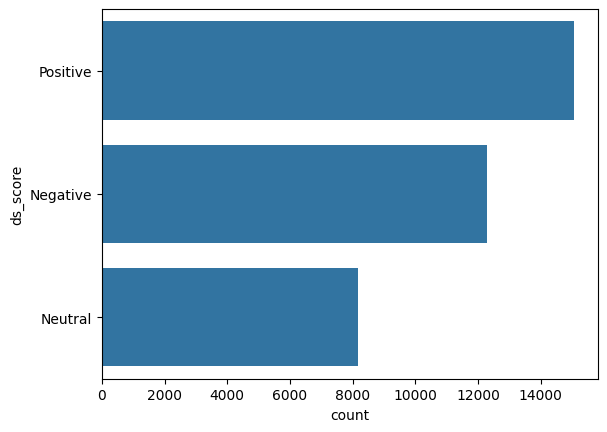

In [78]:
sns.countplot(df_concatened_d['ds_score'])

In [79]:
# Observation:
    # Descriptions contains approximately:
        # 14000 positive statment
        # 12000 negative statment
        # 8000 neutral statment

In [80]:
# Plot a pie plot on description score column

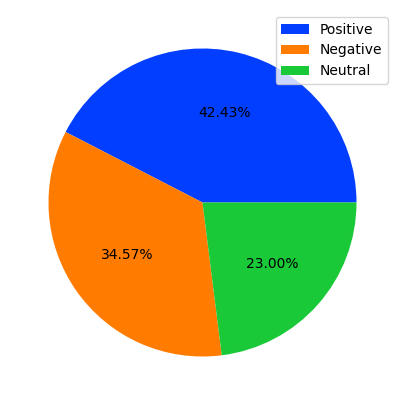

In [81]:
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
# plotting data on chart
plt.figure(figsize = (20,5))
plt.pie(df_concatened_d['ds_score'].value_counts(normalize = True), autopct='%.2f%%', colors=palette_color)
plt.legend(['Positive', 'Negative', 'Neutral'])
# displaying chart
plt.show()

In [82]:
# Observation:
#     Descriptions contains:
#         42.43 % positive statments
#         34.57 % negtive statements
#         23.00 % neutral statments

In [83]:
# Spliting in Independent and Dependent Features

In [84]:
X = df_concatened_d['Description']
y = df_concatened_d['ds_score']

In [85]:
# Train test split
    # Split the dataset into test and train
    # 90% train , 10% test and random state 212

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state = 212)

# Modelling on description of cnbc headlines dataset and reuters headline dataset on datasets

In [87]:
 '''All Models'''
models = {
1 : make_pipeline(TfidfVectorizer(),LinearSVC(random_state=0, tol=1e-5)),
2 : make_pipeline(CountVectorizer(),TfidfTransformer(),LogisticRegression()),
3 : make_pipeline(CountVectorizer(),TfidfTransformer(),MultinomialNB()),
4 : make_pipeline(CountVectorizer(),TfidfTransformer(),BernoulliNB()),
5 : make_pipeline(CountVectorizer(),TfidfTransformer(),GradientBoostingClassifier()),
6 : make_pipeline(CountVectorizer(),TfidfTransformer(),xg.XGBClassifier()),
7 : make_pipeline(CountVectorizer(),TfidfTransformer(),DecisionTreeClassifier()),
8 : make_pipeline(CountVectorizer(),TfidfTransformer(),KNeighborsClassifier())
}
map_keys = list(models.keys())

In [88]:
def get_model_building_technique_name(num):
    if num == 1:
     return 'LinearSVC'
    if num == 2:
     return 'LogisticRegression'
    if num == 3:
     return 'MultinomialNB'
    if num == 4:
     return 'BernoulliNB'
    if num == 5:
     return 'GradientBoostingClassifier'
    if num == 6:
     return 'XGBClassifier'
    if num == 7:
     return 'DecisionTreeClassifier'
    if num == 8:
     return 'KNeighborsClassifier'
    return ''

In [167]:
results = []
for key_index in range(len(map_keys)):
    try:
        key = map_keys[key_index]
        model = models[key]
        print(key)
        model.fit(X_train, y_train)
        
        '''Test Accuracy'''
        y_pred = model.predict(X_test)
        Accuracy_Test = accuracy_score(y_test, y_pred)
        conf_mat_Test = confusion_matrix(y_test, y_pred)
        true_positive_Test = conf_mat_Test[0][0]
        false_positive_Test = conf_mat_Test[0][1]
        false_negative_Test = conf_mat_Test[1][0]
        true_negative_Test = conf_mat_Test[1][1]
        Precision_Test = true_positive_Test / (true_positive_Test + false_positive_Test)
        Recall_Test = true_positive_Test / (true_positive_Test + false_negative_Test)
        F1_Score_Test = 2 * (Recall_Test * Precision_Test) / (Recall_Test + Precision_Test)
        # AUC_Test = roc_auc_score(y_test, y_pred)
        
        '''Train Accuracy'''
        y_pred_train = model.predict(X_train)
        Accuracy_Train = accuracy_score(y_train, y_pred_train)
        conf_mat_Train = confusion_matrix(y_train, y_pred_train)
        true_positive_Train = conf_mat_Train[0][0]
        false_positive_Train = conf_mat_Train[0][1]
        false_negative_Train = conf_mat_Train[1][0]
        true_negative_Train = conf_mat_Train[1][1]
        Precision_Train = true_positive_Train / (true_positive_Train + false_positive_Train)
        Recall_Train = true_positive_Train / (true_positive_Train + false_negative_Train)
        F1_Score_Train = 2 * (Recall_Train * Precision_Train) / (Recall_Train + Precision_Train)
        # AUC_Train = roc_auc_score(y_train, y_pred_train)
        
        results.append({
            'Model Name': get_model_building_technique_name(key),
            'Trained Model': model,
            'Accuracy_Test': Accuracy_Test,
            'Precision_Test': Precision_Test,
            'Recall_Test': Recall_Test,
            'F1_Score_Test': F1_Score_Test,
            # 'AUC_Test': AUC_Test,
            'Accuracy_Train': Accuracy_Train,
            'Precision_Train': Precision_Train,
            'Recall_Train': Recall_Train,
            'F1_Score_Train': F1_Score_Train
            # 'AUC_Train': AUC_Train
        })
    except:
        print('Error')


1
2
3
4
5
6
Error
7
8
Error


In [90]:
print(results)

[{'Model Name': 'LinearSVC', 'Trained Model': Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('linearsvc', LinearSVC(random_state=0, tol=1e-05))]), 'Accuracy_Test': 0.9321509009009009, 'Precision_Test': 0.9614065180102916, 'Recall_Test': 0.9816112084063048, 'F1_Score_Test': 0.9714038128249568, 'Accuracy_Train': 0.9871413822231956, 'Precision_Train': 0.9977097838035911, 'Recall_Train': 0.9927985414767548, 'F1_Score_Train': 0.9952481038106553}, {'Model Name': 'LogisticRegression', 'Trained Model': Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('tfidftransformer', TfidfTransformer()),
                ('logisticregression', LogisticRegression())]), 'Accuracy_Test': 0.8944256756756757, 'Precision_Test': 0.9329214474845543, 'Recall_Test': 0.967948717948718, 'F1_Score_Test': 0.9501123595505617, 'Accuracy_Train': 0.9534774583111723, 'Precision_Train': 0.9755982218859359, 'Recall_Train': 0.9864205795161136, 'F1_Score_Train': 0.9809795530194959}

In [91]:
result_df = pd.DataFrame(results)
result_df['difference_f1_score'] = abs(result_df['F1_Score_Test'] - result_df['F1_Score_Train'])
# result_df_test = result_df.iloc[: , [0,2,3,4,5]]
# result_df_train = result_df.iloc[: , [0,6,7,8,9]]
result_df

,Model Name,Trained Model,Accuracy_Test,Precision_Test,Recall_Test,F1_Score_Test,Accuracy_Train,Precision_Train,Recall_Train,F1_Score_Train,difference_f1_score
0,LinearSVC,"(TfidfVectorizer(), LinearSVC(random_state=0, ...",0.932151,0.961407,0.981611,0.971404,0.987141,0.997710,0.992799,0.995248,0.023844
1,LogisticRegression,"(CountVectorizer(), TfidfTransformer(), Logist...",0.894426,0.932921,0.967949,0.950112,0.953477,0.975598,0.986421,0.980980,0.030867
2,MultinomialNB,"(CountVectorizer(), TfidfTransformer(), Multin...",0.639921,0.990196,0.843424,0.910936,0.716516,0.994617,0.871009,0.928718,0.017783
3,BernoulliNB,"(CountVectorizer(), TfidfTransformer(), Bernou...",0.739302,0.942564,0.871090,0.905419,0.827019,0.960318,0.919350,0.939388,0.033969
4,GradientBoostingClassifier,"(CountVectorizer(), TfidfTransformer(), ([Deci...",0.841779,0.842644,0.987991,0.909548,0.847042,0.845086,0.992098,0.912710,0.003163
5,DecisionTreeClassifier,"(CountVectorizer(), TfidfTransformer(), Decisi...",0.874155,0.982659,0.986460,0.984556,1.000000,1.000000,1.000000,1.000000,0.015444


In [92]:
# Save best model

In [93]:
 Best_Model_Name = result_df[result_df['difference_f1_score'] == min(result_df['difference_f1_score'])]['Trained Model'].values[0]
import pickle
with open('financial_news_model_d.sav', 'wb') as best_model_pickle:
    pickle.dump(Best_Model_Name, best_model_pickle)

In [94]:
# Working with test dataset
# Perforn the prediction on the test dataset

In [95]:
loaded_model_cr = pickle.load(open('financial_news_model_d.sav', 'rb'))
result = loaded_model_cr.predict(X_test)
pd.DataFrame(result)

,0
0,Negative
1,Neutral
2,Neutral
3,Positive
4,Neutral
...,...
3547,Negative
3548,Positive
3549,Neutral
3550,Positive


In [96]:
# Working with headlines + description of cnbc and reuters datasets

In [97]:
# Creating copy of orifioriginalngal

In [98]:
 df_concatened_d_copied = df_concatened_d.copy()

In [99]:
# Merge headlines and description of new dataset and name it info

In [100]:
df_concatened_d['info'] = df_concatened_d['Headlines'] + ' ' + df_concatened_d['Description']

In [101]:
# Only keep info and time column . drop all remaining columns

In [102]:
df_concatened_d.drop(['Headlines', 'Description', 'ds_score'], axis = 1, inplace = True)

In [103]:
# Apply preprocessing on info column

In [104]:
df_concatened_d['info'] = df_concatened_d['info'].apply(lambda x : preprocess(x))

In [105]:
# Analyze polarity score of values in info and add new column of it in dataset

In [106]:
df_concatened_d['ds_score_info'] = df_concatened_d['info'].apply(lambda x: polarity(x))

In [107]:
# Apply the function which decides sentiment to polarity score column

In [108]:
 df_concatened_d['ds_score_info'] = df_concatened_d['ds_score_info'].apply(lambda x : assign_sentiment(x))

In [109]:
df_concatened_d.head()

,Time,info,ds_score_info
0,"7:51 PM ET Fri, 17 July 2020",jim cramer better way invest covid19 vaccin go...,Positive
1,"7:33 PM ET Fri, 17 July 2020",cramer lightn round would teradyn mad money ho...,Negative
2,"7:25 PM ET Fri, 17 July 2020",cramer week ahead big week earn even bigger we...,Positive
3,"4:24 PM ET Fri, 17 July 2020",iq capit ceo keith bliss say tech healthcar ra...,Positive
4,"7:36 PM ET Thu, 16 July 2020",wall street deliv kind pullback ive wait jim c...,Negative


In [111]:
# Create a count plot on info_score column

<Axes: xlabel='count', ylabel='ds_score_info'>

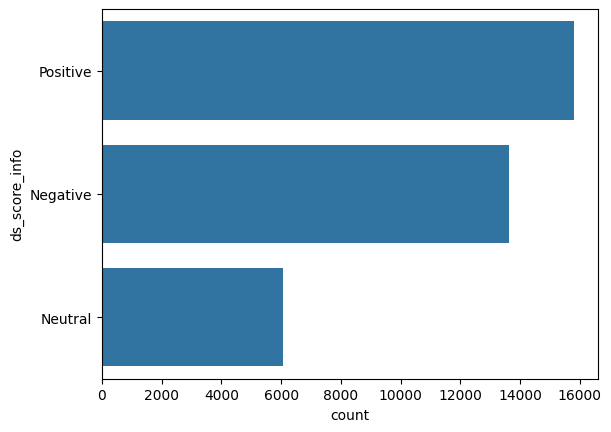

In [112]:
sns.countplot(df_concatened_d['ds_score_info'])

In [113]:
# Observation:
#     Headlines & Descriptions contains approximatley:
#         15500 positive statment
#         13000 negative statment
#         6500 neutral statment

In [114]:
# Create a pie chart on info_score column

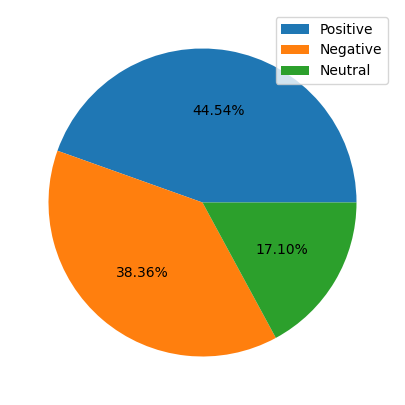

In [115]:
# plotting data on chart
plt.figure(figsize = (20,5))
plt.pie(df_concatened_d['ds_score_info'].value_counts(normalize = True), autopct='%.2f%%')
plt.legend(['Positive', 'Negative', 'Neutral'])
# displaying chart
plt.show()

In [116]:
# Observation:
# Headlines & Descriptions contains:
# 44.5 % positive statments
# 38.36 % negtive statements
# 17.10 % neutral statments

In [117]:
# Spliting in Independent and Dependent Features

In [118]:
X = df_concatened_d['info']
y = df_concatened_d['ds_score_info']

In [119]:
# Train test split
    # Split the dataset into test and train
    # 90% train , 10% test and random state 212

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state = 212)

# Modelling on headlines + description of cnbc and reuters datasets

In [121]:
 '''All Models'''
models = {
1 : make_pipeline(TfidfVectorizer(),LinearSVC(random_state=0, tol=1e-5)),
2 : make_pipeline(CountVectorizer(),TfidfTransformer(),LogisticRegression()),
3 : make_pipeline(CountVectorizer(),TfidfTransformer(),MultinomialNB()),
4 : make_pipeline(CountVectorizer(),TfidfTransformer(),BernoulliNB()),
5 : make_pipeline(CountVectorizer(),TfidfTransformer(),GradientBoostingClassifier()),
6 : make_pipeline(CountVectorizer(),TfidfTransformer(),xg.XGBClassifier()),
7 : make_pipeline(CountVectorizer(),TfidfTransformer(),DecisionTreeClassifier()),
8 : make_pipeline(CountVectorizer(),TfidfTransformer(),KNeighborsClassifier())
}
map_keys = list(models.keys())

In [122]:
def get_model_building_technique_name(num):
    if num == 1:
     return 'LinearSVC'
    if num == 2:
     return 'LogisticRegression'
    if num == 3:
     return 'MultinomialNB'
    if num == 4:
     return 'BernoulliNB'
    if num == 5:
     return 'GradientBoostingClassifier'
    if num == 6:
     return 'XGBClassifier'
    if num == 7:
     return 'DecisionTreeClassifier'
    if num == 8:
     return 'KNeighborsClassifier'
    return ''

In [168]:
results = []
for key_index in range(len(map_keys)):
    try:
        key = map_keys[key_index]
        model = models[key]
        print(key)
        model.fit(X_train, y_train)
        
        '''Test Accuracy'''
        y_pred = model.predict(X_test)
        Accuracy_Test = accuracy_score(y_test, y_pred)
        conf_mat_Test = confusion_matrix(y_test, y_pred)
        true_positive_Test = conf_mat_Test[0][0]
        false_positive_Test = conf_mat_Test[0][1]
        false_negative_Test = conf_mat_Test[1][0]
        true_negative_Test = conf_mat_Test[1][1]
        Precision_Test = true_positive_Test / (true_positive_Test + false_positive_Test)
        Recall_Test = true_positive_Test / (true_positive_Test + false_negative_Test)
        F1_Score_Test = 2 * (Recall_Test * Precision_Test) / (Recall_Test + Precision_Test)
        # AUC_Test = roc_auc_score(y_test, y_pred)
        
        '''Train Accuracy'''
        y_pred_train = model.predict(X_train)
        Accuracy_Train = accuracy_score(y_train, y_pred_train)
        conf_mat_Train = confusion_matrix(y_train, y_pred_train)
        true_positive_Train = conf_mat_Train[0][0]
        false_positive_Train = conf_mat_Train[0][1]
        false_negative_Train = conf_mat_Train[1][0]
        true_negative_Train = conf_mat_Train[1][1]
        Precision_Train = true_positive_Train / (true_positive_Train + false_positive_Train)
        Recall_Train = true_positive_Train / (true_positive_Train + false_negative_Train)
        F1_Score_Train = 2 * (Recall_Train * Precision_Train) / (Recall_Train + Precision_Train)
        # AUC_Train = roc_auc_score(y_train, y_pred_train)
        
        results.append({
            'Model Name': get_model_building_technique_name(key),
            'Trained Model': model,
            'Accuracy_Test': Accuracy_Test,
            'Precision_Test': Precision_Test,
            'Recall_Test': Recall_Test,
            'F1_Score_Test': F1_Score_Test,
            # 'AUC_Test': AUC_Test,
            'Accuracy_Train': Accuracy_Train,
            'Precision_Train': Precision_Train,
            'Recall_Train': Recall_Train,
            'F1_Score_Train': F1_Score_Train
            # 'AUC_Train': AUC_Train
        })
    except:
        print('Error')


1
2
3
4
5
6
Error
7
8
Error


In [169]:
print(results)

[{'Model Name': 'LinearSVC', 'Trained Model': Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('linearsvc', LinearSVC(random_state=0, tol=1e-05))]), 'Accuracy_Test': 0.9713053263315828, 'Precision_Test': 0.9805573558003888, 'Recall_Test': 0.9960500329163924, 'F1_Score_Test': 0.9882429784454605, 'Accuracy_Train': 0.9893295542171185, 'Precision_Train': 0.996588693957115, 'Recall_Train': 0.9959646559521325, 'F1_Score_Train': 0.9962765772349237}, {'Model Name': 'LogisticRegression', 'Trained Model': Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('tfidftransformer', TfidfTransformer()),
                ('logisticregression', LogisticRegression())]), 'Accuracy_Test': 0.9328582145536384, 'Precision_Test': 0.9223237597911227, 'Recall_Test': 0.9950704225352113, 'F1_Score_Test': 0.9573170731707318, 'Accuracy_Train': 0.9626742804743347, 'Precision_Train': 0.9579021471312918, 'Recall_Train': 0.9962659247327573, 'F1_Score_Train': 0.9767074615080932}

In [125]:
result_df = pd.DataFrame(results)
result_df['difference_f1_score'] = abs(result_df['F1_Score_Test'] - result_df['F1_Score_Train'])
# result_df_test = result_df.iloc[: , [0,2,3,4,5]]
# result_df_train = result_df.iloc[: , [0,6,7,8,9]]
result_df

,Model Name,Trained Model,Accuracy_Test,Precision_Test,Recall_Test,F1_Score_Test,Accuracy_Train,Precision_Train,Recall_Train,F1_Score_Train,difference_f1_score
0,LinearSVC,"(TfidfVectorizer(), LinearSVC(random_state=0, ...",0.901464,0.961875,0.968026,0.964940,0.983950,0.998019,0.993263,0.995635,0.030695
1,LogisticRegression,"(CountVectorizer(), TfidfTransformer(), Logist...",0.871059,0.963533,0.936220,0.949681,0.939899,0.985091,0.975645,0.980345,0.030665
2,MultinomialNB,"(CountVectorizer(), TfidfTransformer(), Multin...",0.668919,1.000000,0.855864,0.922335,0.717486,0.999682,0.867905,0.929145,0.006810
3,BernoulliNB,"(CountVectorizer(), TfidfTransformer(), Bernou...",0.719313,0.955366,0.878603,0.915378,0.811032,0.968690,0.929815,0.948855,0.033477
4,GradientBoostingClassifier,"(CountVectorizer(), TfidfTransformer(), ([Deci...",0.725225,0.976378,0.995984,0.986083,0.740857,0.983748,0.992711,0.988209,0.002125
5,DecisionTreeClassifier,"(CountVectorizer(), TfidfTransformer(), Decisi...",0.827421,0.966148,0.985994,0.975970,1.000000,1.000000,1.000000,1.000000,0.024030


# Save Best Model

In [127]:
Best_Model_Name = result_df[result_df['difference_f1_score'] == min(result_df['difference_f1_score'])]['Trained Model'].values[0]
import pickle
with open('financial_news_model_hd.sav', 'wb') as best_model_pickle:
    pickle.dump(Best_Model_Name, best_model_pickle)

In [128]:
# Working with test dataset

In [129]:
# Perform the prediction on the test dataset

In [130]:
# Perforn the prediction on the test dataset
best_model_hd = pickle.load(open('financial_news_model_hd.sav', 'rb'))
result = best_model_hd.predict(X_test)
pd.DataFrame(result)

,0
0,Negative
1,Negative
2,Positive
3,Positive
4,Positive
...,...
3547,Negative
3548,Positive
3549,Positive
3550,Positive


# Working on headlines of cnbc, reuters and guardian datasets

In [131]:
# From the dataset you have copied before delete the column of description

In [132]:
df_concatened_d_copied = df_concatened_d_copied.drop(['Description'], axis = 1)
df_concatened_d_copied = df_concatened_d_copied.drop(['ds_score'], axis = 1)

In [133]:
# Concatenate the gaurdian headlines dataset and copy of dataset to get all headlines together

In [134]:
df_concatened_h = pd.concat([df_guardian,df_concatened_d_copied], axis = 0).reset_index(drop = True)

In [135]:
# Check the shape of all headlines dataset

In [136]:
df_concatened_h.shape

(53315, 2)

In [137]:
# Apply preprocessing to the headlines column in the new dataset

In [138]:
df_concatened_h['Headlines'] = df_concatened_h['Headlines'].apply(lambda x : preprocess(x))
df_concatened_h.head()

,Time,Headlines
0,18-Jul-20,johnson ask santa christma recoveri
1,18-Jul-20,‘ fear worst ’ four grim tale work life upend ...
2,18-Jul-20,five key area sunak must tackl serv econom rec...
3,18-Jul-20,covid19 leav firm ‘ fatal illprepar ’ nodeal b...
4,18-Jul-20,week patriarchi bacardi ladi vodka latest long...


In [139]:
# Analyze polarity score of values in headlines and add new column of it in dataset

In [140]:
df_concatened_h['ds_score_headlines'] = df_concatened_h['Headlines'].apply(lambda x: polarity(x))

In [141]:
# Apply the function which decides sentiment to polarity score column

In [142]:
df_concatened_h['ds_score_headlines'] = df_concatened_h['ds_score_headlines'].apply(lambda x : assign_sentiment(x))

In [143]:
df_concatened_h.head()

,Time,Headlines,ds_score_headlines
0,18-Jul-20,johnson ask santa christma recoveri,Neutral
1,18-Jul-20,‘ fear worst ’ four grim tale work life upend ...,Negative
2,18-Jul-20,five key area sunak must tackl serv econom rec...,Neutral
3,18-Jul-20,covid19 leav firm ‘ fatal illprepar ’ nodeal b...,Negative
4,18-Jul-20,week patriarchi bacardi ladi vodka latest long...,Negative


In [144]:
# Create a countplot on headline score column

<Axes: xlabel='count', ylabel='ds_score_headlines'>

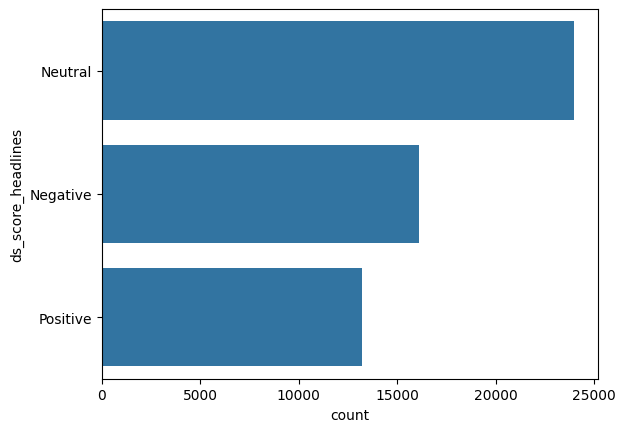

In [145]:
sns.countplot(df_concatened_h['ds_score_headlines'])

In [146]:
# Observation:
#     Headlines contains approximately:
#         14000 positive statment
#         16000 negative statment
#         24000 neutral statment

In [147]:
# Create a pie digram on headline score column

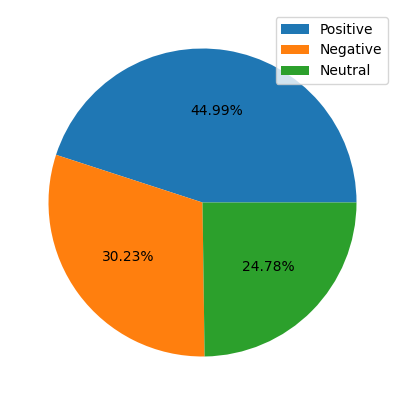

In [148]:
# plotting data on chart
plt.figure(figsize = (20,5))
plt.pie(df_concatened_h['ds_score_headlines'].value_counts(normalize = True), autopct='%.2f%%')
plt.legend(['Positive', 'Negative', 'Neutral'])
# displaying chart
plt.show()

In [149]:
# Observation:
#     Headlines contains:
#         24.8% positive statments
#         30.3% negtive statements
#         44.9% neutral statments

In [150]:
# Spliting in Independent and Dependent Features

In [151]:
X = df_concatened_h['Headlines']
y = df_concatened_h['ds_score_headlines']

In [152]:
# Train test split

In [153]:
# Split the dataset into test and train
# 90% train , 10% test and random state 212

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state = 212)

# Modeling on headlines

In [155]:
 '''All Models'''
models = {
1 : make_pipeline(TfidfVectorizer(),LinearSVC(random_state=0, tol=1e-5)),
2 : make_pipeline(CountVectorizer(),TfidfTransformer(),LogisticRegression()),
3 : make_pipeline(CountVectorizer(),TfidfTransformer(),MultinomialNB()),
4 : make_pipeline(CountVectorizer(),TfidfTransformer(),BernoulliNB()),
5 : make_pipeline(CountVectorizer(),TfidfTransformer(),GradientBoostingClassifier()),
6 : make_pipeline(CountVectorizer(),TfidfTransformer(),xg.XGBClassifier()),
7 : make_pipeline(CountVectorizer(),TfidfTransformer(),DecisionTreeClassifier()),
8 : make_pipeline(CountVectorizer(),TfidfTransformer(),KNeighborsClassifier())
}
map_keys = list(models.keys())

In [156]:
def get_model_building_technique_name(num):
    if num == 1:
     return 'LinearSVC'
    if num == 2:
     return 'LogisticRegression'
    if num == 3:
     return 'MultinomialNB'
    if num == 4:
     return 'BernoulliNB'
    if num == 5:
     return 'GradientBoostingClassifier'
    if num == 6:
     return 'XGBClassifier'
    if num == 7:
     return 'DecisionTreeClassifier'
    if num == 8:
     return 'KNeighborsClassifier'
    return ''

In [166]:
results = []
for key_index in range(len(map_keys)):
    try:
        key = map_keys[key_index]
        model = models[key]
        print(key)
        model.fit(X_train, y_train)
        
        '''Test Accuracy'''
        y_pred = model.predict(X_test)
        Accuracy_Test = accuracy_score(y_test, y_pred)
        conf_mat_Test = confusion_matrix(y_test, y_pred)
        true_positive_Test = conf_mat_Test[0][0]
        false_positive_Test = conf_mat_Test[0][1]
        false_negative_Test = conf_mat_Test[1][0]
        true_negative_Test = conf_mat_Test[1][1]
        Precision_Test = true_positive_Test / (true_positive_Test + false_positive_Test)
        Recall_Test = true_positive_Test / (true_positive_Test + false_negative_Test)
        F1_Score_Test = 2 * (Recall_Test * Precision_Test) / (Recall_Test + Precision_Test)
        
        '''Train Accuracy'''
        y_pred_train = model.predict(X_train)
        Accuracy_Train = accuracy_score(y_train, y_pred_train)
        conf_mat_Train = confusion_matrix(y_train, y_pred_train)
        true_positive_Train = conf_mat_Train[0][0]
        false_positive_Train = conf_mat_Train[0][1]
        false_negative_Train = conf_mat_Train[1][0]
        true_negative_Train = conf_mat_Train[1][1]
        Precision_Train = true_positive_Train / (true_positive_Train + false_positive_Train)
        Recall_Train = true_positive_Train / (true_positive_Train + false_negative_Train)
        F1_Score_Train = 2 * (Recall_Train * Precision_Train) / (Recall_Train + Precision_Train)
        
        results.append({
            'Model Name': get_model_building_technique_name(key),
            'Trained Model': model,
            'Accuracy_Test': Accuracy_Test,
            'Precision_Test': Precision_Test,
            'Recall_Test': Recall_Test,
            'F1_Score_Test': F1_Score_Test,
            # 'AUC_Test': AUC_Test,
            'Accuracy_Train': Accuracy_Train,
            'Precision_Train': Precision_Train,
            'Recall_Train': Recall_Train,
            'F1_Score_Train': F1_Score_Train
            # 'AUC_Train': AUC_Train
        })
    except:
        print('Error')


1
2
3
4
5
6
Error
7
8
Error


In [158]:
result_df['difference_f1_score'] = abs(result_df['F1_Score_Test'] - result_df['F1_Score_Train'])
# result_df_test = result_df.iloc[: , [0,2,3,4,5]]
# result_df_train = result_df.iloc[: , [0,6,7,8,9]]
result_df

,Model Name,Trained Model,Accuracy_Test,Precision_Test,Recall_Test,F1_Score_Test,Accuracy_Train,Precision_Train,Recall_Train,F1_Score_Train,difference_f1_score
0,LinearSVC,"(TfidfVectorizer(), LinearSVC(random_state=0, ...",0.901464,0.961875,0.968026,0.964940,0.983950,0.998019,0.993263,0.995635,0.030695
1,LogisticRegression,"(CountVectorizer(), TfidfTransformer(), Logist...",0.871059,0.963533,0.936220,0.949681,0.939899,0.985091,0.975645,0.980345,0.030665
2,MultinomialNB,"(CountVectorizer(), TfidfTransformer(), Multin...",0.668919,1.000000,0.855864,0.922335,0.717486,0.999682,0.867905,0.929145,0.006810
3,BernoulliNB,"(CountVectorizer(), TfidfTransformer(), Bernou...",0.719313,0.955366,0.878603,0.915378,0.811032,0.968690,0.929815,0.948855,0.033477
4,GradientBoostingClassifier,"(CountVectorizer(), TfidfTransformer(), ([Deci...",0.725225,0.976378,0.995984,0.986083,0.740857,0.983748,0.992711,0.988209,0.002125
5,DecisionTreeClassifier,"(CountVectorizer(), TfidfTransformer(), Decisi...",0.827421,0.966148,0.985994,0.975970,1.000000,1.000000,1.000000,1.000000,0.024030


In [159]:
Best_Model_Name = result_df[result_df['difference_f1_score'] == min(result_df['difference_f1_score'])]['Trained Model'].values[0]
import pickle
with open('financial_news_model_h.sav', 'wb') as best_model_pickle:
    pickle.dump(Best_Model_Name, best_model_pickle)

# Working with test dataset

In [160]:
# Perforn the prediction on the test dataset

In [161]:
best_model_h = pickle.load(open('financial_news_model_h.sav', 'rb'))
result = best_model_h.predict(X_test)
pd.DataFrame(result)

,0
0,Positive
1,Positive
2,Positive
3,Positive
4,Negative
...,...
5327,Positive
5328,Positive
5329,Positive
5330,Positive


# Prediction

In [162]:
# You can check the result on real time news headlines
# Here i have used two fiancial news headlines and predicted its sentiment
# You can try more

In [163]:
sent1 = ['GST officers detect Rs 4,000 crore of ITC fraud in April-June']
y_predict = best_model_h.predict(sent1)
y_predict

array(['Negative'], dtype=object)

In [164]:
sent2 = ["Finance Ministry releases Rs 9,871 crore to 17 states as grant"]
y_predict = best_model_h.predict(sent2)
y_predict

array(['Positive'], dtype=object)

# Conclusion

In [165]:
# We learn about NLTK and classification ML model, sentiment analysis in this assigment. 
# We conclude that using nltk it is easy to classify financial news and more we improve the traning data more we can get accurate